# Αναγνώριση Προτύπων

## 1ο εργαστήριο

## Αριστοτέλης-Γεώργιος Συμπέθερος  Α.Μ.:03116005
## Σάββας Σιφναίος Α.Μ.:03116080 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import lib 
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import learning_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings("ignore")
from time import time

## Step 1

In [2]:
#Reading data from .txt files to 4 numpy arrays (scikit compatible):X_train,y_train, X_test,y_test
with open ('train.txt') as file :
    lines_train = file.readlines()

X_train = np.empty((len(lines_train),256))
y_train = np.empty((len(lines_train)))
for i,line in enumerate(lines_train):
    X_train[i,...] = np.asarray(line.split()[1:])
    y_train[i,...]= float(line.split()[0])
    y_train = y_train.astype(int)
    
with open ('test.txt') as file :
    lines_test = file.readlines()

X_test = np.empty((len(lines_test),256))
y_test = np.empty((len(lines_test)))

for i,line in enumerate(lines_test):
    X_test[i,...] = np.asarray(line.split()[1:])
    y_test[i,...]= (float(line.split()[0]))
    y_test = y_test.astype(int)

print(f"Train set shape is {X_train.shape} and train labels shape is {y_train.shape}")
print(f"Test set shape is {X_test.shape} and test labels shape is {y_test.shape}")

Train set shape is (2007, 256) and train labels shape is (2007,)
Test set shape is (2007, 256) and test labels shape is (2007,)


## Step 2 

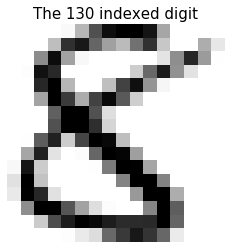

In [3]:
#Plot the 131th digit from train test
lib.show_sample(X_train,130)

In [4]:
print(f"The label of the 130 indexed digit is {y_train[130]}")

The label of the 130 indexed digit is 8


## Step 3 

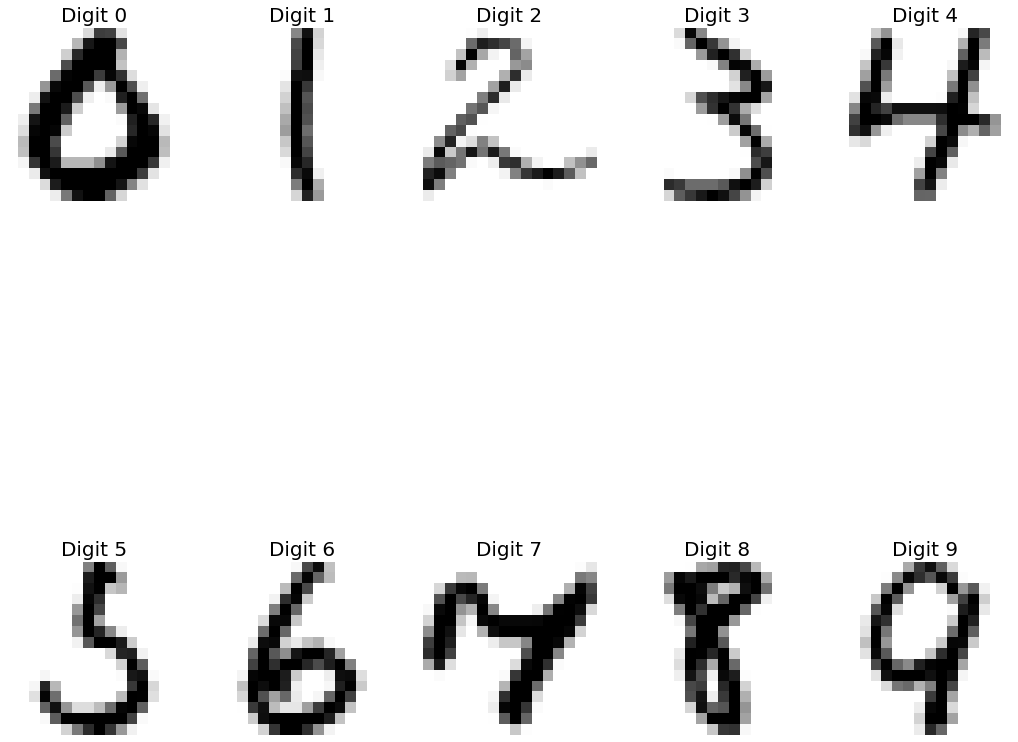

In [5]:
lib.plot_digits_samples(X_train,y_train)

## Step 4

In [6]:
pixel=(10,10)

print(f'Mean Value of pixel {pixel} for digit zero in train Set is {lib.digit_mean_at_pixel(X_train,y_train,0,pixel)}')

Mean Value of pixel (10, 10) for digit zero in train Set is -0.38300000000000006


## Step 5

In [7]:
print(f'Variance of pixel {pixel} for digit zero in train Set is {lib.digit_variance_at_pixel(X_train,y_train,0,pixel)}')


Variance of pixel (10, 10) for digit zero in train Set is 0.6082944066852368


## Step 6

In [8]:
mean_array_0=lib.digit_mean(X_train,y_train,0)
var_array_0=lib.digit_variance(X_train,y_train,0)

mean_array_0_reshaped=np.reshape(mean_array_0,(16,16))
var_array_0_reshaped=np.reshape(var_array_0,(16,16))

#Mean and variance at pixel (10,10) for digit 0
print(mean_array_0_reshaped[10,10])              #Same as calculated before with digit_mean_at_pixel
print(var_array_0_reshaped[10,10])               #Same as calculated before with digit_variance_at_pixel


-0.38300000000000006
0.6082944066852368


## Step 7-8 

In [9]:
#Ploting digit 0 from the values of mean and variance corresnpondigly as calculated in step 6
def plot_from_mean_var(X, y, digit):

    mean_array=lib.digit_mean(X,y,digit)
    var_array=lib.digit_variance(X,y,digit)

    mean_array=np.reshape(mean_array,(16,16))
    var_array=np.reshape(var_array,(16,16))

    f , (ax0,ax1) = plt.subplots(1,2,figsize=(18,18))
    ax0.imshow(mean_array,cmap='gray_r')
    ax0.set_title("Digit {} from mean of values in train set".format(digit),fontsize=20)
    ax1.imshow(var_array,cmap='gray_r')
    _=ax1.set_title("Digit {} from variance of values in train set".format(digit),fontsize=20)
    plt.show()

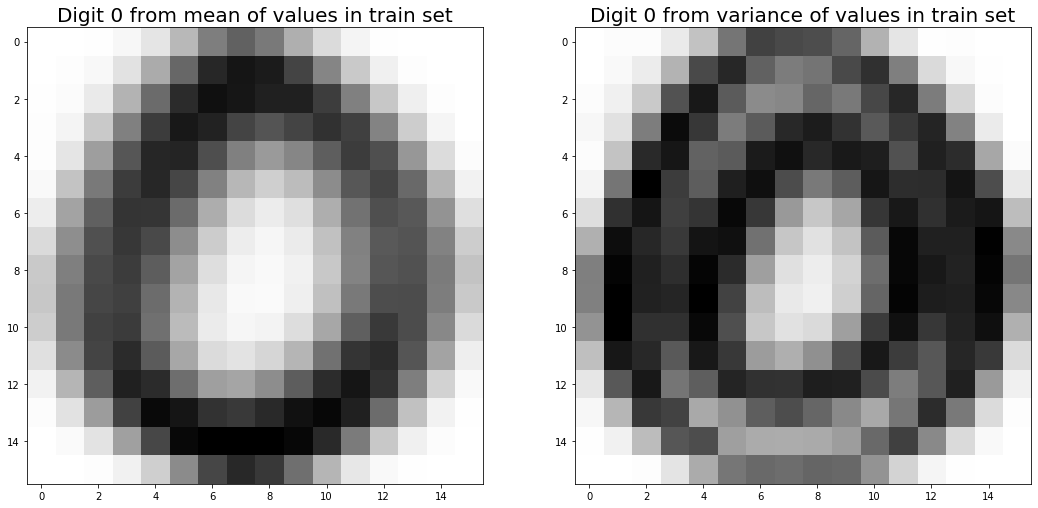

In [10]:
#Plotting digit "0" from its mean and variance values as calculated in step 6 (from train set)
plot_from_mean_var(X_train,y_train,0)


## Step 9 

In [11]:
#Ploting all digits based on the mean values and the variances correspondingly as calculated in step 9 (a)
def plot_from_mean_var_all(X, y):    
    mean_array=np.empty((10,16,16))
    var_array=np.empty((10,16,16))
    
    for i in range(10):
        tmp_mean=lib.digit_mean(X,y,i)
        mean_array[i]=np.reshape(tmp_mean,(16,16))
        tmp_var=lib.digit_variance(X,y,i)
        var_array[i]=np.reshape(tmp_var,(16,16))

    f, axes = plt.subplots(2,5, figsize=(18, 18))      
    f.subplots_adjust(wspace=0.1,hspace=-0.7)
    f.suptitle("Digits from mean of train set",size=20, y=0.7)
    row=0  
    for i in range(10):
        j=i
        if i>=5:
            row=1
            j=i-5

        axes[row,j].imshow(mean_array[i],cmap='gray_r')
        axes[row,j].set_title(f'Digit {i}',size=20)
        axes[row,j].axis('off')
    plt.show()
    print()
    f, axes = plt.subplots(2,5, figsize=(18, 18))      
    f.subplots_adjust(wspace=0.1,hspace=-0.7)
    f.suptitle("Digits from variance of train set",size=20, y=0.7)
    row=0  
    for i in range(10):
        j=i
        if i>=5:
            row=1
            j=i-5

        axes[row,j].imshow(var_array[i],cmap='gray_r')
        axes[row,j].set_title(f'Digit {i}',size=20)
        axes[row,j].axis('off')

    plt.show()

### α)

In [12]:
mean_array=np.empty((10,256))
for i in range(10):
    mean_array[i]=lib.digit_mean(X_train,y_train,i)

### β)

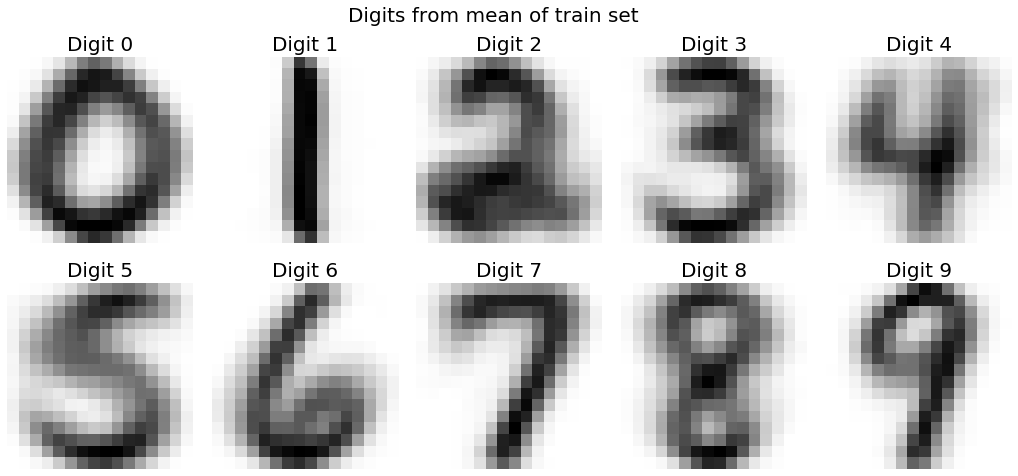

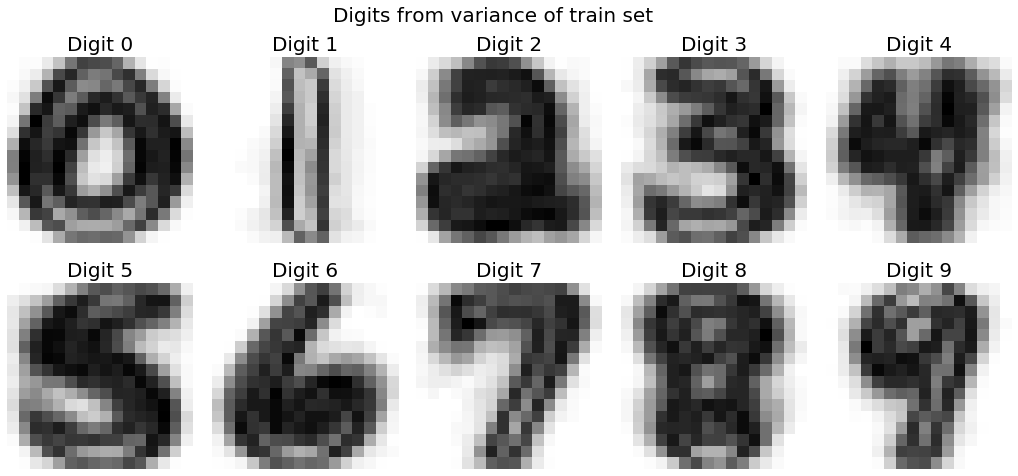

In [13]:
#Plotting all digits from their mean and variance values as calculated in step 6 (from train set)
plot_from_mean_var_all(X_train,y_train)

## Step 10

In [14]:
y=lib.euclidean_distance_classifier(X_test[100,:],mean_array)

print(f'Digit with in 101 position is classified as {int(y)}')
print(f'Digit with in 101 position is actually a {int(y_test[100])}')

Digit with in 101 position is classified as 0
Digit with in 101 position is actually a 0


## Step 11

### α)

In [15]:
y_pred=lib.euclidean_distance_classifier(X_test,mean_array)

### β)

In [16]:
print(f'The accuracy of the Euclidean Distance Classifier is {accuracy_score(y_pred,y_test)}')

The accuracy of the Euclidean Distance Classifier is 0.8196312904833084


## Step 12 


#### implemented in lib.py in class EuclidianDistanceClassifier()

In [17]:
clf = lib.EuclideanDistanceClassifier()
clf.fit(X_train,y_train)
clf.predict(X_test)
print(f'Once again, the accuracy of Euclidean Distance Classifier is :')
print(clf.score(X_test,y_test))

Once again, the accuracy of Euclidean Distance Classifier is :
0.8196312904833084


## Step 13 

### α)

In [18]:
print (f'The accuracy of Euclidean Distance Classifier when using 5-fold-cross-validation is :')
print(lib.evaluate_classifier(clf,X_train,y_train))

The accuracy of Euclidean Distance Classifier when using 5-fold-cross-validation is :
0.8071736082678875


### β)

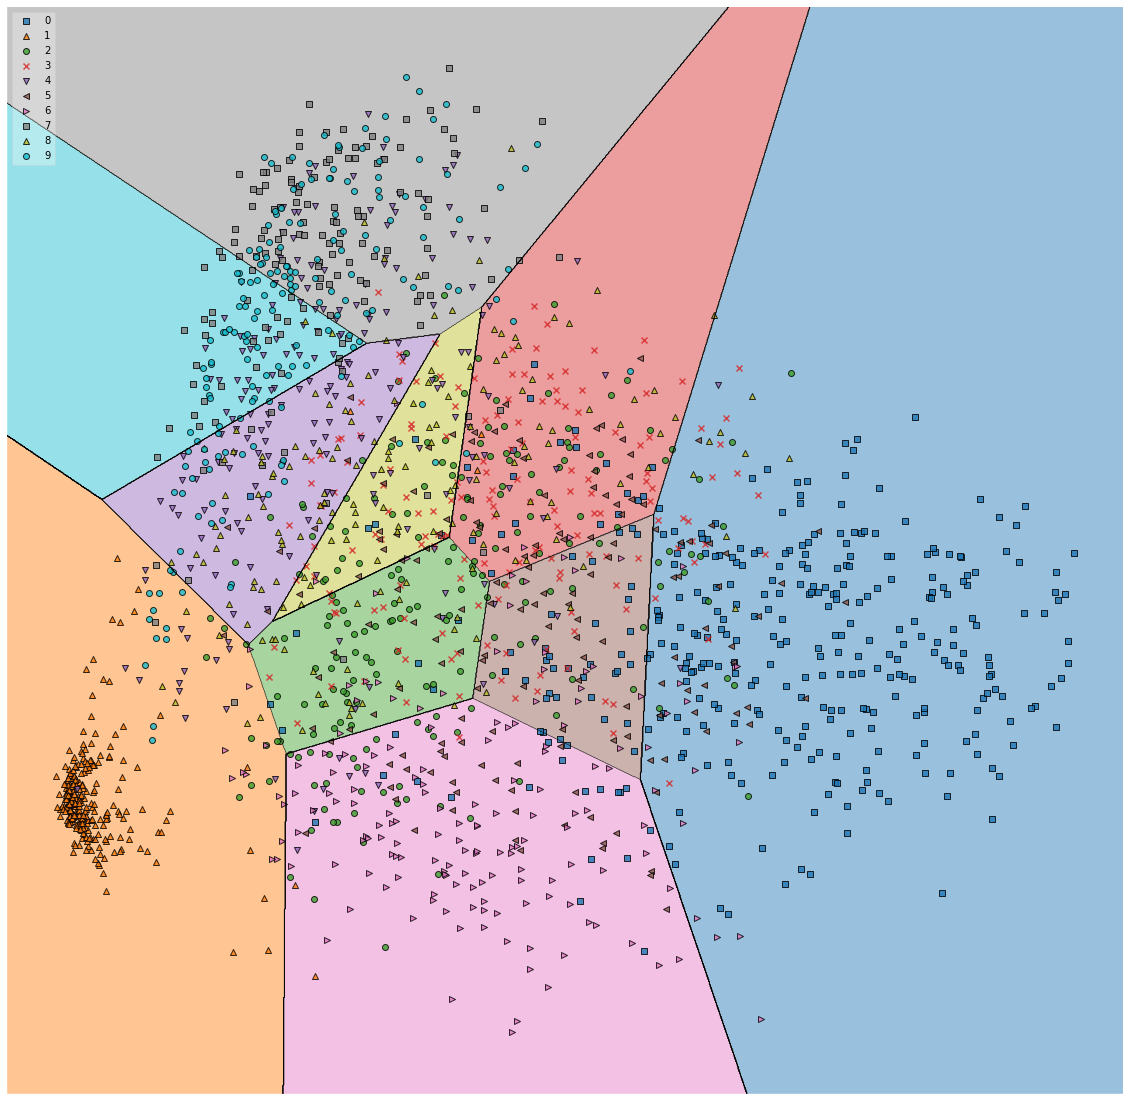

In [19]:
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)
clf.fit(X_train_reduced,y_train)

plt.figure(figsize=(20,20))
plot_decision_regions(X_test_reduced,y_test,clf = clf ,legend =2)
plt.axis('off')
plt.show()


### γ) 

In [20]:
def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/home/savvas/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

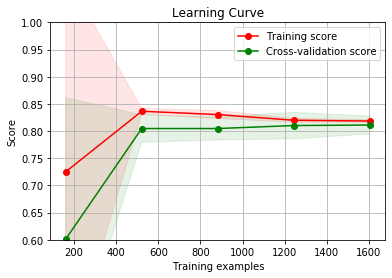

In [21]:
train_sizes, train_scores, test_scores = learning_curve(
    clf,X_train,y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5))
plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.6, 1))
plt.show()

### Step 14 

In [22]:
#Printing apriori propabilities
apriori=lib.calculate_priors(X_train,y_train)
_=[print("Digit {} has a-priori propability of {:.3f}".format(i,j)) for i,j in enumerate(apriori)]

Digit 0 has a-priori propability of 0.179
Digit 1 has a-priori propability of 0.132
Digit 2 has a-priori propability of 0.099
Digit 3 has a-priori propability of 0.083
Digit 4 has a-priori propability of 0.100
Digit 5 has a-priori propability of 0.080
Digit 6 has a-priori propability of 0.085
Digit 7 has a-priori propability of 0.073
Digit 8 has a-priori propability of 0.083
Digit 9 has a-priori propability of 0.088


### Step 15 (α)

In [23]:
# Our custom (Gaussian) Naive Bayes Classifier
clf=lib.CustomNBClassifier()
clf.fit(X_train,y_train)

CustomNBClassifier()

### Step 15(β)

In [24]:
time0 = time()
print(clf.score(X_test,y_test))
print("\nTοtal Time (in minutes) =",(time()-time0)/60)

0.6651718983557549

Tοtal Time (in minutes) = 0.40926579634348553


### Step 15 (γ)

In [25]:
#scikit learn (Gaussian) Naive Bayes Classifier
time0 = time()
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print(accuracy_score(np.asarray(gnb.predict(X_test)),y_test))
print("\nTοtal Time (in minutes) =",(time()-time0)/60)

0.6651718983557549

Tοtal Time (in minutes) = 0.0002105275789896647


### Step 16

In [26]:
clf=lib.CustomNBClassifier(use_unit_variance=True)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.8186347782760339

### Step 17

In [27]:
#Cross validation with all dataset (Train and Test)
X=np.append(X_train,X_test,axis=0)
y=np.append(y_train,y_test,axis=0)

In [28]:
print(f"SVM Linear classifier accuracy is {lib.evaluate_linear_svm_classifier(X,y)}")
print(f"SVM Rbf classifier accuracy is {lib.evaluate_rbf_svm_classifier(X,y)}")
print(f"SVM Poly classifier accuracy is {lib.evaluate_poly_svm_classifier(X,y)}")
print(f"SVM Sigmoid classifier accuracy is {lib.evaluate_sigmoid_svm_classifier(X,y)}")


SVM Linear classifier accuracy is 1.0
SVM Rbf classifier accuracy is 0.9810663254690175
SVM Poly classifier accuracy is 0.9967618314115085
SVM Sigmoid classifier accuracy is 0.8654720608193092


In [29]:
print(f"5NN classifier accuracy is {lib.evaluate_knn_classifier(X,y)}")

5NN classifier accuracy is 0.9367210864495051


In [30]:
print(f"Sklearn Naive Bayes classifier accuracy is {lib.evaluate_sklearn_nb_classifier(X,y)}")

Sklearn Naive Bayes classifier accuracy is 0.6556997916168482


In [31]:
print(f"Custom Naive Bayes classifier accuracy is {lib.evaluate_custom_nb_classifier(X,y)}")

Custom Naive Bayes classifier accuracy is 0.6561979236218296


In [32]:
print(f"Euclidean distance classifier accuracy is {lib.evaluate_euclidean_classifier(X,y)}")

Euclidean distance classifier accuracy is 0.8146507951789269


### Step pre-18

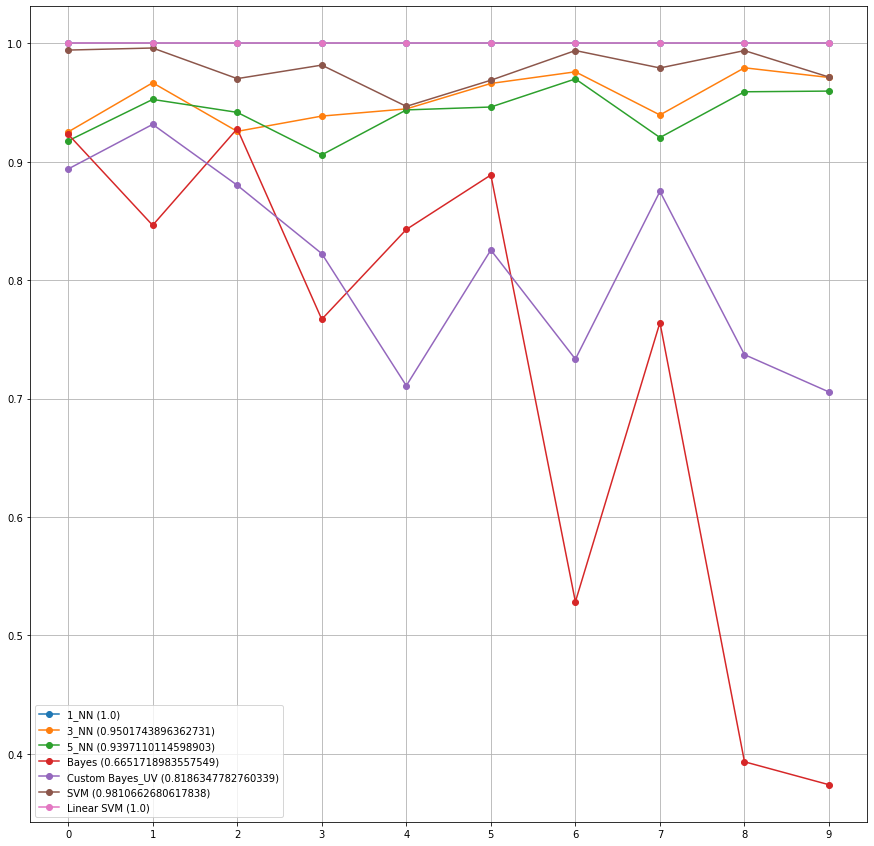

In [33]:
#Plotting accuracy per class for various of the above classifiers 

#Initializing each classifier
clf_bayes = GaussianNB()
clf_custom_bayes_UV = lib.CustomNBClassifier(True)
clf_1_KNN = KNeighborsClassifier(n_neighbors=1)
clf_3_KNN = KNeighborsClassifier(n_neighbors=3)
clf_5_KNN = KNeighborsClassifier(n_neighbors=5)
clf_SVM = SVC(kernel='rbf')
clf_LSVM = SVC(kernel='linear')

#Fitting training data to all of them
clf_bayes.fit(X_train,y_train)
clf_custom_bayes_UV.fit(X_train,y_train)
clf_1_KNN.fit(X_train,y_train)
clf_3_KNN.fit(X_train,y_train)
clf_5_KNN.fit(X_train,y_train)
clf_SVM.fit(X_train,y_train)
clf_LSVM.fit(X_train,y_train)

#Getting prediction for each of the classifiers
bayes_preds = clf_bayes.predict(X_test)
custom_bayes_UV_preds = clf_custom_bayes_UV.predict(X_test)
_1_KNN_preds = clf_1_KNN.predict(X_test)
_3_KNN_preds =clf_3_KNN.predict(X_test)
_5_KNN_preds = clf_5_KNN.predict(X_test)
SVM_preds = clf_SVM.predict(X_test)
SVM_Linear_preds = clf_LSVM.predict(X_test)

#Getting accuracy for each of the classifiers 
bayes_score = clf_bayes.score(X_test,y_test)
custom_bayes_UV_score = clf_custom_bayes_UV.score(X_test,y_test)
_1_KNN_score = clf_1_KNN.score(X_test,y_test)
_3_KNN_score =clf_3_KNN.score(X_test,y_test)
_5_KNN_score = clf_5_KNN.score(X_test,y_test)
SVM_score = clf_SVM.score(X_test,y_test)
SVM_Linear_score = clf_LSVM.score(X_test,y_test)

#Getting accuracy per class for each classifier
_1_KNN_spc = lib.score_per_class(_1_KNN_preds,y_test)
_3_KNN_spc = lib.score_per_class(_3_KNN_preds,y_test)
_5_KNN_spc = lib.score_per_class(_5_KNN_preds,y_test)
bayes_spc = lib.score_per_class(bayes_preds,y_test)
custom_bayes_UV_spc = lib.score_per_class(custom_bayes_UV_preds,y_test)
svm_spc = lib.score_per_class(SVM_preds,y_test)
SVM_Linear_spc = lib.score_per_class(SVM_Linear_preds,y_test)


#Plotting the above
xaxis = np.arange (10)
plt.figure(figsize=(15,15))
plt.grid ()
plt.xticks(xaxis)
plt.plot (_1_KNN_spc, 'o-', label = '1_NN (' + str (_1_KNN_score) + ')')
plt.plot (_3_KNN_spc, 'o-', label = '3_NN (' + str (_3_KNN_score) + ')')
plt.plot (_5_KNN_spc, 'o-', label = '5_NN (' + str (_5_KNN_score) + ')')
plt.plot (bayes_spc, 'o-', label = 'Bayes (' + str (bayes_score) + ')')
plt.plot (custom_bayes_UV_spc, 'o-', label = 'Custom Bayes_UV (' + str (custom_bayes_UV_score) + ')')
plt.plot (svm_spc, 'o-', label = 'SVM (' + str (SVM_score) + ')')
plt.plot (SVM_Linear_spc, 'o-', label = 'Linear SVM (' + str (SVM_Linear_score) + ')')
plt.legend()
plt.show()

### Step 18  (α)

In [34]:
means  = lib.evaluate_voting_classifier(X,y)
print (f'The accuracy of Soft Voting Classifier when using 5-fold-cross-validation is :\n {means[1]}')
print('---------------------------------------------------------------------------------')
print (f'The accuracy of Hard Voting Classifier when using 5-fold-cross-validation is :\n{means[0]}')

The accuracy of Soft Voting Classifier when using 5-fold-cross-validation is :
 0.998007161423962
---------------------------------------------------------------------------------
The accuracy of Hard Voting Classifier when using 5-fold-cross-validation is :
0.9860488877432818


### Step 18 (β)

In [35]:
mean = lib.evaluate_bagging_classifier(X,y)
print (f'The accuracy of Bagging Classifier when using 5-fold-cross-validation is :\n{mean}')

The accuracy of Bagging Classifier when using 5-fold-cross-validation is :
0.9848032471747157


## 19 (Bonus)


### Step 19 (β)

In [36]:
print(f'\nThe first Neural Network is : {lib.NN1Hidden()}\n')
print('-----------------------------------------------------------------------------------------------------------------')
print(f'\nThe second Neural Network is : {lib.Mynn()}\n')
print('-----------------------------------------------------------------------------------------------------------------')
print(f'\nThe third Neural Network is : {lib.NN3Hidden()}')


The first Neural Network is : NN1Hidden(
  (linear1): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

-----------------------------------------------------------------------------------------------------------------

The second Neural Network is : Mynn(
  (hidden1): Linear(in_features=256, out_features=64, bias=True)
  (hidden2): Linear(in_features=64, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

-----------------------------------------------------------------------------------------------------------------

The third Neural Network is : NN3Hidden(
  (linear1): Linear(in_features=256, out_features=4, bias=True)
  (linear2): Linear(in_features=4, out_features=2, bias=True)
  (linear3): Linear(in_features=2, out_features=1, bias=True)
  (output): Linear(in_features=1, out_features=10, bias=True)
  (log

### Step 19 (γ)

In [37]:
# Evaluate Neural Network with one hidden layer of shape (256,64)
print(f'Evaluation of Neural Network {lib.NN1Hidden()} on Train and Validation data ... \n')
_=(lib.PytorchNNModel(lib.NN1Hidden()).fit(X_train,y_train))
print('-----------------------------------------------------------------------------------------------------------------')
# Evaluate Neural Network with two hidden layers of shape (256,64) and (64,64) respectively
print(f'\nEvaluation of Neural Network {lib.Mynn()} on Train and Validation data ... \n')
_=(lib.PytorchNNModel(lib.Mynn()).fit(X_train,y_train))
print('-----------------------------------------------------------------------------------------------------------------')
#Evaluate Neural Network with three hidden layers of shape (256,4) , (4,2) and (2,1) respectively
print(f'\nEvaluation of Neural Network {lib.NN3Hidden()} on Train and Validation data ... \n')
_=(lib.PytorchNNModel(lib.NN3Hidden()).fit(X_train,y_train))

Evaluation of Neural Network NN1Hidden(
  (linear1): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
) on Train and Validation data ... 

Epoch 0 (on Val set) -loss: 2.1898243610675516 -accuracy:0.3192019950124688
Epoch 10 (on Val set) -loss: 0.38868478055183703 -accuracy:0.8753117206982544
Epoch 20 (on Val set) -loss: 0.26012963686998075 -accuracy:0.885286783042394
Epoch 30 (on Val set) -loss: 0.2088789212015959 -accuracy:0.8827930174563591
Epoch 40 (on Val set) -loss: 0.2087514030818756 -accuracy:0.8778054862842892
Epoch 50 (on Val set) -loss: 0.15002429026823777 -accuracy:0.885286783042394
Epoch 60 (on Val set) -loss: 0.11326232065375035 -accuracy:0.885286783042394
Epoch 70 (on Val set) -loss: 0.09704640736946693 -accuracy:0.885286783042394
Epoch 80 (on Val set) -loss: 0.07770821803177778 -accuracy:0.8877805486284289
Epoch 90 (on Val set) -loss: 0.0664223087951541 -accuracy:0.8902743

### Step 19 (δ)

In [38]:
# Evaluate Neural Network with one hidden layer of shape (256,64)
print(f'The 5-fold cross-validation accuracy of Neural Network {lib.NN1Hidden()} is : {lib.evaluate_nn_classifier(np.append(X_train,X_test,axis=0),np.append(y_train,y_test,axis=0) , model = lib.NN1Hidden())}\n')
print('-----------------------------------------------------------------------------------------------------------------')
# Evaluate Neural Network with two hidden layers of shape (256,64) and (64,64) respectively
print(f'The 5-fold cross-validation accuracy of Neural Network {lib.Mynn()} is : {lib.evaluate_nn_classifier(np.append(X_train,X_test,axis=0),np.append(y_train,y_test,axis=0) , model = lib.Mynn())}\n')
print('-----------------------------------------------------------------------------------------------------------------')
#Evaluate Neural Network with three hidden layers of shape (256,4) , (4,2) and (2,1) respectively
print(f'The 5-fold cross-validation accuracy of Neural Network {lib.NN3Hidden()} is : {lib.evaluate_nn_classifier(np.append(X_train,X_test,axis=0),np.append(y_train,y_test,axis=0) , model = lib.NN3Hidden())}\n')

The 5-fold cross-validation accuracy of Neural Network NN1Hidden(
  (linear1): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
) is : 0.9788222469976988

-----------------------------------------------------------------------------------------------------------------
The 5-fold cross-validation accuracy of Neural Network Mynn(
  (hidden1): Linear(in_features=256, out_features=64, bias=True)
  (hidden2): Linear(in_features=64, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
) is : 0.9833094722719974

-----------------------------------------------------------------------------------------------------------------
The 5-fold cross-validation accuracy of Neural Network NN3Hidden(
  (linear1): Linear(in_features=256, out_features=4, bias=True)
  (linear2): Linear(in_features=4, out_features=2, bias=True)
  (linear3)